In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from neupy import algorithms, environment
from mpl_toolkits.mplot3d import Axes3D

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df_train = pd.read_csv("data_train.csv")
df_test = pd.read_csv("data_test.csv")

In [3]:
x_train = df_train.values[:,:-1]
x_test = df_test.values[:,:-1]

In [4]:
%%time
sofm = algorithms.SOFM(
    n_inputs=3,
    n_outputs=4,
    learning_radius=0,
    step=0.25,
    shuffle_data=True,
    weight='sample_from_data',
    verbose=False,
)
sofm.train(x_train, epochs=200)

Wall time: 3min 54s


In [5]:
pred_train = sofm.predict(x_train)
pred_test = sofm.predict(x_test)

## Plot x_train data and centers

In [6]:
%matplotlib tk
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*x_train.T, s=2, c="blue", alpha=1)
ax.scatter(*sofm.weight, c="red", s=100)
plt.show()

## Plot x_test data and centers

In [9]:
%matplotlib tk
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*x_test.T, s=2, c="blue", alpha=1)
ax.scatter(*sofm.weight, c="red", s=100)
plt.show()

## Plot x_train clusters

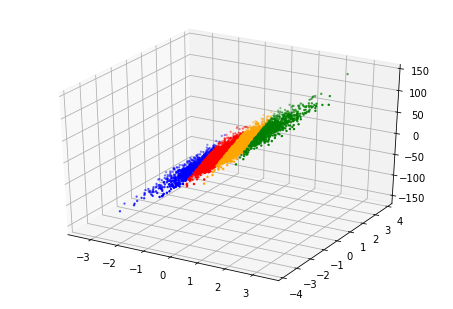

In [8]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*x_train[pred_train[:,0].astype(bool)].T,c="blue", s=2)
ax.scatter(*x_train[pred_train[:,1].astype(bool)].T,c="green", s=2)
ax.scatter(*x_train[pred_train[:,2].astype(bool)].T,c="red", s=2)
ax.scatter(*x_train[pred_train[:,3].astype(bool)].T,c="orange", s=2)
plt.show()

## Plot x_test clusters

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*x_test[pred_test[:,0].astype(bool)].T,c="blue", s=2)
ax.scatter(*x_test[pred_test[:,1].astype(bool)].T,c="green", s=2)
ax.scatter(*x_test[pred_test[:,2].astype(bool)].T,c="red", s=2)
ax.scatter(*x_test[pred_test[:,3].astype(bool)].T,c="orange", s=2)
plt.show()

In [ ]:
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(sofm.errors)
plt.show()

